# Teorema do Limite Central (*Central Limit Theorem*)

O TLC é um resultado muito importante da Estatística. Considere uma população com média $\mu$ e variância $\sigma^2$. O TLC declara que,
conforme consideramos tamanhos de amostra $n$ cada vez maiores:

1. A distribuição amostral da média amostral $\overline{x}$ (i.e., a distribuição das médias computadas para as amostras de um dado tamanho fixo $n$) aproxima-se cada vez mais de uma distribuição normal:
$$
\overline{x} \sim \mathcal{N}\left(\mu_{\overline{x}}, \sigma^2_{\overline{x}}\right)
$$

2. Essa distribuição amostral (aproximadamente normal) terá uma média próxima à media da população.
$$
\mu_{\overline{x}}= \operatorname{E}[\overline{x}] \approx \mu
$$
3. A variância da média amostral é próxima à variância da população dividida pelo tamanho das amostras.
$$
\sigma_{\overline{x}}^2 = Var[\overline{x}] \approx \frac{\sigma^2}{n}
$$

Alguns comentários sobre os itens do TLC:

- O item 1 afirma que a distribuição amostral das média se aproxima de uma curva normal. Isso é verdade, independentemente da forma da distribuição da população da qual as médias são obtidas, desde que o tamanho da amostra seja razoavelmente grande (mais de 30).

- O item 2 afirma que média de uma distribuição amostral das médias (a média das médias) é exatamente igual à verdadeira média da população, no caso teórico: $\mu_{\overline{x}} = \mu$. No caso empírico, se tomarmos um grande número de médias de amostras aleatórias da mesma população e computarmos a distribuição amostral empírica de $\overline{x}$, essa distribuição terá média próxima à média da população.

- Sobre o item 3, podemos também afirmar que desvio padrão de uma distribuição amostral de médias é menor do que o desvio padrão da população. Em particular $\sigma_{\overline{x}} = \sigma/\sqrt{n}$.

A figura a seguir ([fonte](https://medium.com/@birajparikh/what-is-central-limit-theorem-clt-db3679433dcb)) fornece uma visão intuitiva acerca do TLC e sua relação com a distribuição amostral de $\overline{x}$.

<p align="center">
    <img src="https://miro.medium.com/max/1400/1*tJoyMMcdILCO8PQJ6d5RRA.jpeg" width="500"/>
</p>

O TLC afirma que a distribuição de $\overline{x}$ aproxima-se de uma distribuição normal conforme $n$ tende a infinito, e que a rapidez dessa convergência depende da distribuição da população. Se a população possuir uma distribuição

* *bastante assimétrica*, será necessário um $n$ relativamente grande para obter uma boa aproximação.
* *aproximadamente simétrica*, a aproximação do TLC pode ser boa até para valores pequenos de $n$.

Evidências empíricas mostram que, para a maioria das populações, se o tamanho da amostra for maior do que 30, a aproximação do TLC é boa. De todo modo, é importante entender que o TLC vale para **qualquer quer seja a distribuição da população**, para $n$ suficientemente grande. Isso é esquematicamente ilustrado na figura a seguir ([fonte](https://www.whatissixsigma.net/central-limit-theorem/)).

<p align="center">
    <img src="http://www.whatissixsigma.net/wp-content/uploads/2014/05/Central-Limit-Theorem-Distribution-Diagram.png"/>
</p>



## Simulação para ilustrar o TLC

Podemos exemplificar o TLC com uma simulação que envolve o lançamento de um dado de 6 lados (exemplo adaptado de https://machinelearningmastery.com/a-gentle-introduction-to-the-central-limit-theorem-for-machine-learning/). Cada resultado tem uma probabilidade de 1 em 6. A distribuição dos números que aparecem em uma jogada de dados é uniforme, conforme ilustra o histograma na figura a seguir ([fonte](https://study.com/academy/lesson/uniform-distribution-in-statistics-definition-examples.html)). Essa é a **distribuição da população**.

<p align="center">
    <img src="https://study.com/cimages/multimages/16/uniform_distribution_die_v2.png" width="500"/>
</p>

É possível provar (veja [aqui](https://proofwiki.org/wiki/Expectation_of_Discrete_Uniform_Distribution) e [aqui](https://proofwiki.org/wiki/Variance_of_Discrete_Uniform_Distribution)) que, para uma variável aleatória discreta $X$ que segue uma distribuição uniforme e que pode assumir valores de $a=1$ até $b=6$, sua média é

$$
\mu = \operatorname{E}[X] = \frac{(a+b)}{2} = 3.5
$$

e sua variância é
$$
\sigma^2 = \operatorname{Var}[X] = \frac{(b-a+1)^{2}-1}{12} \approx 2.9166...
$$

Os valores de $\mu$ e de $\sigma^2$ acima são os parâmetros populacionais. Em uma situação real, esse valores raramente são conhecidos. Vamos, por meio de uma simulação computacional, verificar a veracidade das declarações do TLC.


O código a seguir usa a biblioteca [matplotlib](https://matplotlib.org) para gerar um gráfico da distribuição da população. O histograma gerado apresenta essencialmente a mesma informação do que a figura acima.

In [16]:
#pip install matplotlib

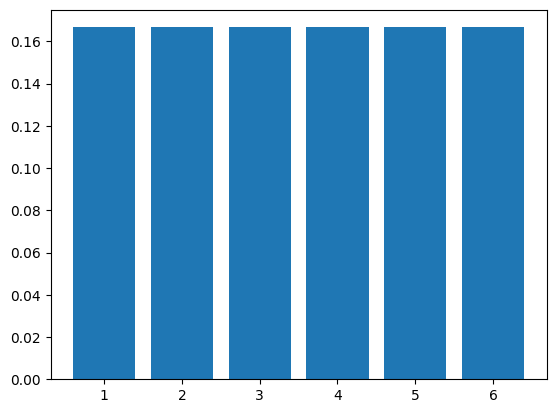

In [17]:
import matplotlib.pyplot as plt

data = [1, 2, 3, 4, 5, 6]

freq = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

plt.bar(data, freq, align='center')
plt.gca().set_xticks(data)
plt.show()

No Python, há diversas formas alternativas para computar a média e a variância de uma população. Por exemplo, os valors obtidos pela aplicação das fórmulas acima podem também ser obtidos de forma programática usando as funções `np.mean` e `np.var`. Veja o bloco de código abaixo.

In [18]:
import numpy as np
print(np.mean(data))
print(np.var(data))

3.5
2.9166666666666665



Podemos usar a função [randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) do NumPy para simular um número específico de *observações*, i.e., de lançamentos do dado. Por exemplo, podemos gerar uma amostra de 50 observações, conforme ilustrado na célula de código abaixo.

In [19]:
from numpy.random import randint

n = 50

# gera uma amostra de 50 lançamentos do dado
rolls = randint(1, 7, n)

print(rolls)

[4 4 6 2 4 6 1 5 6 5 3 2 6 2 2 4 5 4 5 3 4 5 3 5 5 2 4 6 5 6 3 5 3 5 2 6 5
 4 2 1 4 1 2 2 6 5 6 5 6 2]


Agora, em vez de apenas $50$, vamos gerar uma amostra de $10000$ observações. Em seguida, vamos construir a distribuição dessa amostra. O histograma gerado a seguir é a **distribuição da amostra**. Repare que, conforme esperado, a distribução da amostra é semelhante à distribuição da população.

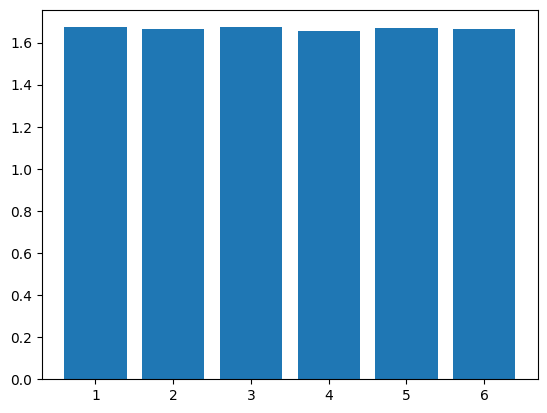

In [20]:
from numpy.random import seed
from numpy.random import randint
from numpy import mean, std
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt

# seed the random number generator
seed(1)

sample = randint(1, 7, 100000)

labels, counts = np.unique(sample, return_counts=True)
plt.bar(labels, counts/10000, align='center')
plt.gca().set_xticks(labels)
plt.show()

Agora, para uma quantidade específica $n$ de lançamentos, podemos computar a média dos valores resultantes. O código a seguir exemplifica isso para $n=30$.

In [21]:
from numpy.random import seed
from numpy.random import randint
from numpy import mean

rolls = randint(1, 7, 30)
print("Observações da amostra:\n", rolls)
print("Média das observações:\n", mean(rolls))

Observações da amostra:
 [5 4 5 6 4 3 6 3 1 2 6 2 4 1 5 4 2 3 1 5 6 3 4 2 1 2 2 2 3 5]
Média das observações:
 3.4


O valor produzido acima é um dos valores que a estatística $\overline{x}$ pode assumir. De fato, podemos produzir múltiplos valores $\overline{x}$ e desenhar o histograma correspondente à **distribuição amostral empírica** de $\overline{x}$, conforme o código abaixo.

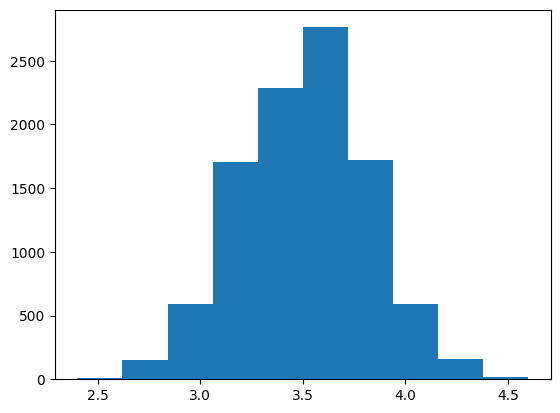

In [22]:
from numpy.random import seed
from numpy.random import randint
from numpy import mean, std
import numpy as np
from matplotlib import pyplot

# seed the random number generator
seed(1)

n = 30
num_amostras = 10000

means = [mean(randint(1, 7, n)) for _ in range(num_amostras)]

pyplot.hist(means)
pyplot.show()

Para verificar numericamente se o resultado que obtemos está consistente com o TLC, podemos computar as aproximações para $\mu_{\overline{x}}$ e para $\sigma^2_{\overline{x}}$, conforme a seguir. Compare os valores produzidos abaixo com $\mu=3.5$ e com $\sigma^2 = 2.9166$. Você deve constatar que obtivemos aproximações bastante precisas para os parâmetros populacionais $\mu$ e $\sigma^2$.

In [23]:
a = 1.0
b = 6.0
temp = (b-a+1)*(b-a+1)

var_x_bar = (temp-1)/12.0
print(var_x_bar)

n = 30
print(var_x_bar/n)

2.9166666666666665
0.09722222222222222


In [24]:
import numpy as np
print(n)
print(np.mean(means))
print(np.var(means))

30
3.5030233333333336
0.09720452612222222


$$
\sigma_{\overline{x}}^2 \approx \frac{\sigma^2}{n} \rightarrow \sigma^2 \approx n \times \sigma_{\overline{x}}^2
$$

Na simulação acima, usamos $n=50$. O TLC prediz que, se usarmos valores cada vez maiores de $n$, as aproximações computadas se tornam cada vez mais precisas. Para verificar isso, repita a simulação acima fazendo $n=500$, $n=5000$, etc.

## Outro exemplo para ilustrar o TLC

Créditos: o código a seguir foi retirado de https://towardsdatascience.com/central-limit-theorem-simulation-with-python-c80f8d3a6755

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plot

url = 'https://eic.cefet-rj.br/~ebezerra/wp-content/uploads/2020/02/CoffeeAndCodeLT2018.csv.txt'
df = pd.read_csv(url)
def look_at_data(dataset):
    print(dataset.head(10))
    print(dataset.info())
    print(dataset.shape)
    print(dataset.describe())
look_at_data(df)

   CodingHours  CoffeeCupsPerDay     CoffeeTime CodingWithoutCoffee  \
0            8                 2  Before coding                 Yes   
1            3                 2  Before coding                 Yes   
2            5                 3   While coding                  No   
3            8                 2  Before coding                  No   
4           10                 3   While coding           Sometimes   
5            8                 2   While coding           Sometimes   
6            5                 2   While coding                 Yes   
7           10                 4  Before coding           Sometimes   
8           10                 2   While coding                 Yes   
9           10                 2   While coding                 Yes   

        CoffeeType CoffeeSolveBugs  Gender  Country  AgeRange  
0      Caffè latte       Sometimes  Female  Lebanon  18 to 29  
1        Americano             Yes  Female  Lebanon  30 to 39  
2          Nescafe        

Vamos considerar como nossa população os valores de quantidades de doses de café consumidas. Esses valores estão na coluna `CoffeeCupsPerDay` do conjunto de dados. A distribiução da população é apresentada abaixo. Repare que a média da população considerada é $\mu = 2.89$.

/tmp/ipykernel_18257/3092092592.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df['CoffeeCupsPerDay'], hist=True, kde=True,


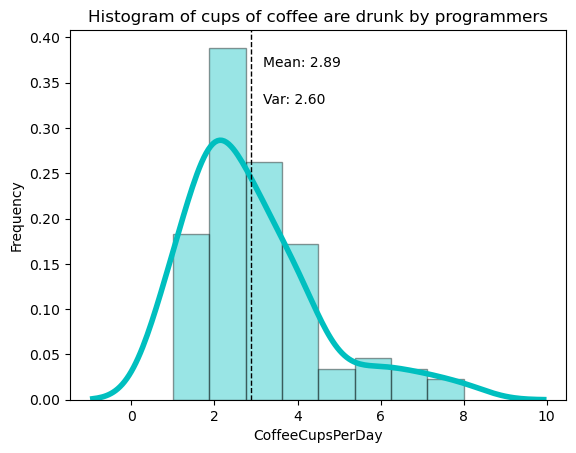

In [2]:
fig, ax = plot.subplots()
fig = sns.distplot(df['CoffeeCupsPerDay'], hist=True, kde=True,
             bins=8, color = 'c',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_xlabel('CoffeeCupsPerDay')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of cups of coffee are drunk by programmers')
plot.axvline(df['CoffeeCupsPerDay'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plot.ylim()
plot.text(df['CoffeeCupsPerDay'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df['CoffeeCupsPerDay'].mean()))
plot.text(df['CoffeeCupsPerDay'].mean()*1.1, max_ylim*0.8, 'Var: {:.2f}'.format(df['CoffeeCupsPerDay'].var()))
plot.show()

Agora, vamos produzir distribuições amostrais para diferentes tamanhos de amostra

/tmp/ipykernel_24840/2579273610.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(array1, hist=True, kde=True,


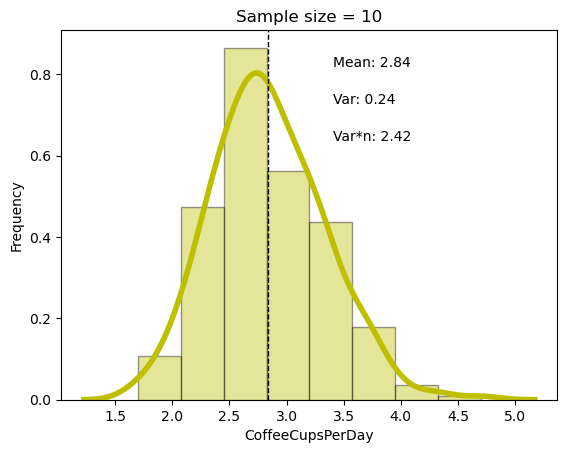

/tmp/ipykernel_24840/2579273610.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(array2, hist=True, kde=True,


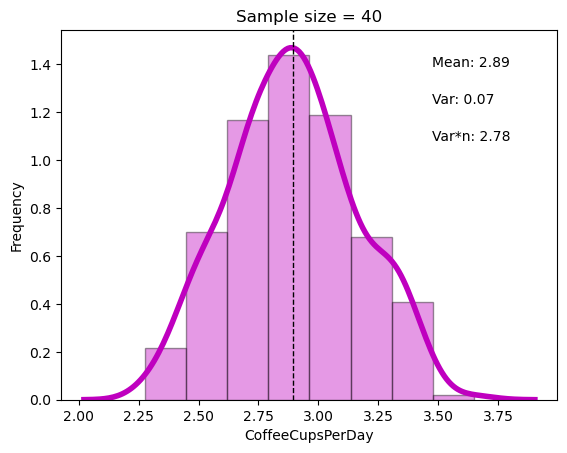

/tmp/ipykernel_24840/2579273610.py:43: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(array3, hist=True, kde=True,


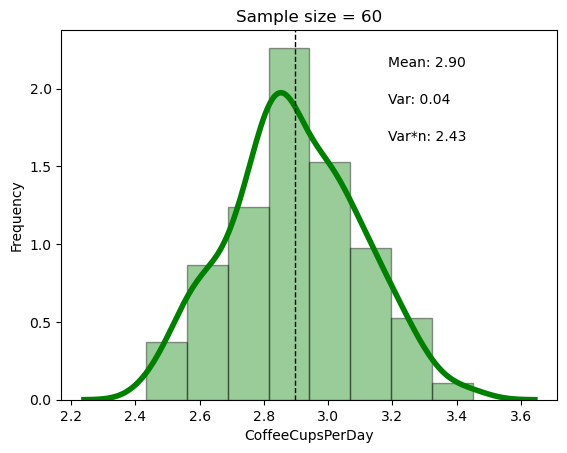

/tmp/ipykernel_24840/2579273610.py:58: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(array4, hist=True, kde=True,


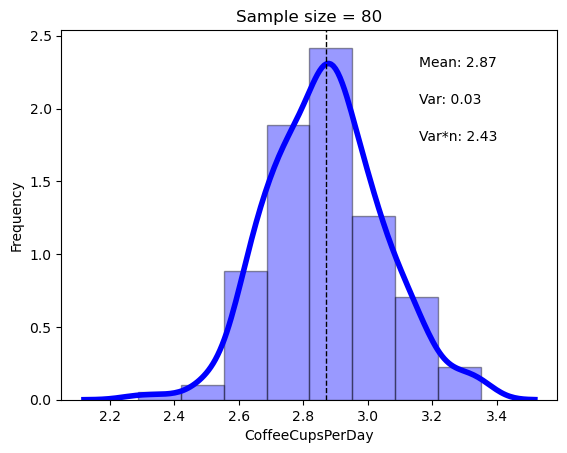

In [11]:
array1 = []
array2 = []
array3 = []
array4 = []
num_amostras = 300
for i in range(1,num_amostras):
    array1.append(df['CoffeeCupsPerDay'].sample(n=10, replace= True).mean())
    array2.append(df['CoffeeCupsPerDay'].sample(n=40, replace=True).mean())
    array3.append(df['CoffeeCupsPerDay'].sample(n=60, replace=True).mean())
    array4.append(df['CoffeeCupsPerDay'].sample(n=80, replace=True).mean())

fig, ax = plot.subplots()
fig = sns.distplot(array1, hist=True, kde=True,
             bins=8, color = 'y',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_xlabel('CoffeeCupsPerDay')
ax.set_ylabel('Frequency')
ax.set_title('Sample size = 10')
plot.axvline(np.mean(array1), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plot.ylim()
plot.text(np.mean(array1)*1.2, max_ylim*0.9, 'Mean: {:.2f}'.format(np.mean(array1)))
plot.text(np.mean(array1)*1.2, max_ylim*0.8, 'Var: {:.2f}'.format(np.var(array1)))
plot.text(np.mean(array1)*1.2, max_ylim*0.7, 'Var*n: {:.2f}'.format(np.var(array1)*10))
plot.show()

fig, ax = plot.subplots()
fig = sns.distplot(array2, hist=True, kde=True,
             bins=8, color = 'm',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_xlabel('CoffeeCupsPerDay')
ax.set_ylabel('Frequency')
ax.set_title('Sample size = 40')
plot.axvline(np.mean(array2), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plot.ylim()
plot.text(np.mean(array2)*1.2, max_ylim*0.9, 'Mean: {:.2f}'.format(np.mean(array2)))
plot.text(np.mean(array2)*1.2, max_ylim*0.8, 'Var: {:.2f}'.format(np.var(array2)))
plot.text(np.mean(array2)*1.2, max_ylim*0.7, 'Var*n: {:.2f}'.format(np.var(array2)*40))
plot.show()

fig, ax = plot.subplots()
fig = sns.distplot(array3, hist=True, kde=True,
             bins=8, color = 'g',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_xlabel('CoffeeCupsPerDay')
ax.set_ylabel('Frequency')
ax.set_title('Sample size = 60')
plot.axvline(np.mean(array3), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plot.ylim()
plot.text(np.mean(array3)*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(np.mean(array3)))
plot.text(np.mean(array3)*1.1, max_ylim*0.8, 'Var: {:.2f}'.format(np.var(array3)))
plot.text(np.mean(array3)*1.1, max_ylim*0.7, 'Var*n: {:.2f}'.format(np.var(array3)*60))
plot.show()

fig, ax = plot.subplots()
fig = sns.distplot(array4, hist=True, kde=True,
             bins=8, color = 'b',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_xlabel('CoffeeCupsPerDay')
ax.set_ylabel('Frequency')
ax.set_title('Sample size = 80')
plot.axvline(np.mean(array4), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plot.ylim()
plot.text(np.mean(array4)*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(np.mean(array4)))
plot.text(np.mean(array4)*1.1, max_ylim*0.8, 'Var: {:.2f}'.format(np.var(array4)))
plot.text(np.mean(array4)*1.1, max_ylim*0.7, 'Var*n: {:.2f}'.format(np.var(array4)*80))
plot.show()

Nos gráficos gerados acima, note que, conforme consideramos tamanhos de amostra cada vez maiores,
1. a forma da distribuição amostral resultante se aproxima cada vez mais da distribuição normal;
2. a média da distribuição amostral se aproxima cada vez mais do valor da média populacional $\mu$;
3. a variância da distribuição amostral se aproxima cada vez mais do valor $\sigma^2/n$;